<a href="https://colab.research.google.com/github/ehsan74814/Preprocessing_Data/blob/main/polynominalRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datasets/saurabh00007/iriscsv

In [ ]:
!curl -L -o iris.csv ....

# Polynominal REgressioN

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
# loading dataset
try:
  df = pd.read_csv("/content/drive/MyDrive/Training ML/polynominalRegression/ENB2012_data.csv", encoding="utf-8")
except UnicodeDecodeError :
  df = pd.read_csv("/content/drive/MyDrive/Training ML/polynominalRegression/ENB2012_data.csv", encoding="latin1") # "ISO-8859-1"

## Data review

In [78]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isnull().sum()

## Delete or fill in missing values

In [ ]:
df.dropna()

In [ ]:
# df.fillna(df.mean(), inplace=True)

## Change data type

In [144]:
# for column in df.columns:
#   if df.dtypes[column] == 'int64':
#     df[column] = df[column].astype("category").cat.codes

In [145]:
df["Orientation"] = df['Orientation'].astype("category").cat.codes

## Data normalization or standardization

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [148]:
df[['Relative Compactness',	'Surface Area', 'Wall Area', 'Roof Area',	'Overall Height',
'Glazing Area',	'Glazing Area Distribution', 'Heating Load', 'Cooling Load']] = scaler.fit_transform( df[['Relative Compactness',
'Surface Area', 'Wall Area', 'Roof Area',	'Overall Height',
'Glazing Area',	'Glazing Area Distribution', 'Heating Load', 'Cooling Load']])




# Model

In [149]:
# Split training and test data

X = df[['Relative Compactness',	'Surface Area', 'Wall Area', 'Roof Area',	'Overall Height',
        'Orientation', 'Glazing Area',	'Glazing Area Distribution']]
y = df[['Heating Load', 'Cooling Load']]

In [150]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Heating Load,Cooling Load
668,-0.578879,-0.808633
324,-0.906142,-0.862277
624,1.042562,0.861696
690,1.885512,2.276427
473,-0.557062,-0.507805
...,...,...
355,1.653453,2.249079
534,1.423377,1.191975
344,0.697448,0.923755
296,0.717282,0.987917


In [152]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
poly = PolynomialFeatures(degree=2)

In [154]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model = LinearRegression().fit(X_train_poly, y_train)

In [157]:
y_pred = model.predict(X_test_poly)

In [158]:
from sklearn.metrics import r2_score, mean_squared_error

In [159]:
mse_heating = mean_squared_error(y_test['Heating Load'], y_pred[:, 0])
r2_heating = r2_score(y_test['Heating Load'], y_pred[:, 0])

In [160]:
mse_cooling= mean_squared_error(y_test['Cooling Load'], y_pred[:, 1])
r2_cooling = r2_score(y_test['Cooling Load'], y_pred[:, 1])

ValueError: x and y must be the same size

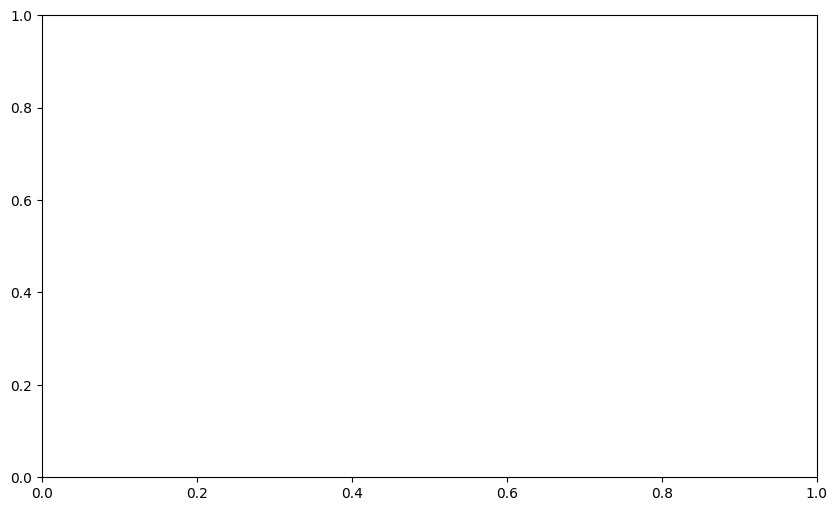

In [161]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="blue", label="Actual Heating Load")
plt.scatter(X_test, y_pred, color="red", label='Predicted Heating Load', alpha=0.5)
plt.title("Polynmial Regression : Actual VS Predicted Heating Load")
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.legend()
plt.grid(True)
plt.show()